In [ ]:
#20230616 pdock 
#7 L bucket, old tubing ? 

In [1]:
# is this the folder with the script in it?
scriptDir<-getwd()
scriptDir

# if not, uncomment and use this instead
# scriptDir<-""

[1] "/Users/jdh/SensorDataProcessing/rriv_methane/anya_methane"

In [5]:
methaneFunctions<-paste(scriptDir,"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/Users/anyaemerson/Documents/github/emersonae/SensorDataProcessing/rriv_methane/anya_methane/methane_functions.r"

In [6]:
# Package names
packages <- c("tidyverse","dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis", "gam", "ggeffects", "reshape2", "mgcv")
packageHandler(packages)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: viridisLite

Loading required package: splines

Loa

In [7]:
directory1<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230616-pdock"


In [8]:
# create output directory path based on input directory
outputDir<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230616-pdock/output"
# create the output directory if necessary
newDir(dirPath = outputDir)

Output directory, ~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230616-pdock/output, already exists


In [9]:
# directory for github 
gitDir<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/github/emersonae/SensorDataProcessing/rriv_methane/anya_methane/figures"


In [11]:
UUIDdict=c(
"57FF6E068387575148360767"="CAL1",
"57FF6D068387575151290167"="CAL2",
"57FF6F068387575149330867"="CAL3",
"57FF6E068387575140070767"="CAL4",
"50FF74068678545256252467"="CAL5")

rriv_data1<-concat_dirs(directory1, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
rriv_data1<-process_rriv_columns(rriv_data1)
rriv_data1<-createSensorColFromIDs(rriv_data1,idCol = "uuid",dict = UUIDdict)
saveDFcsv(rriv_data1)


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


[1] "Dataframe generated, manually process column types if necessary"


Warning message:
“Unknown or uninitialised column: `Sensor`.”


[1] "~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230616-pdock/output/rriv_data1.csv"


In [12]:
lgr_data1<-concat_dirs(directory1, read_GA_ZIP, filePattern=".zip", minFileSize=400)
    clean_temp()
lgr_data1$Time<-lubridate::as_datetime(lgr_data1$Time)
saveDFcsv(lgr_data1)


[1] "Dataframe generated, manually process column types if necessary"
[1] "~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230616-pdock/output/lgr_data1.csv"


In [13]:
# start time is the max between the starting points for each range
    start<-max(range(rriv_data1$time.h)[1],range(lgr_data1$Time)[1])
    # start<-lubridate::as_datetime("2023-06-26 19:36:26.981")
# end time is the min between the ending points for each range
    end<-min(range(rriv_data1$time.h)[2],range(lgr_data1$Time)[2])

# subset the rriv data
rriv_data_overlap1<-rriv_data1[rriv_data1$time.h>start & rriv_data1$time.h<end,]
# range(rriv_data_overlap1$time.h,na.rm=TRUE)
range(rriv_data_overlap1$time.h)

# subset the lgr data
lgr_data_overlap1<-lgr_data1[lgr_data1$Time>start & lgr_data1$Time<end,]
# range(lgr_data_overlap1$Time,na.rm=TRUE)
range(lgr_data_overlap1$Time)

rriv_data_ol_raw1<-rriv_data_overlap1[rriv_data_overlap1$type=="raw",]
rriv_data_ol_summary1<-rriv_data_overlap1[rriv_data_overlap1$type=="summary",]


[1] "2023-06-16 15:02:04 UTC" "2023-06-16 17:17:24 UTC"

[1] "2023-06-16 14:58:23 UTC" "2023-06-16 17:17:39 UTC"

pdf 
  2

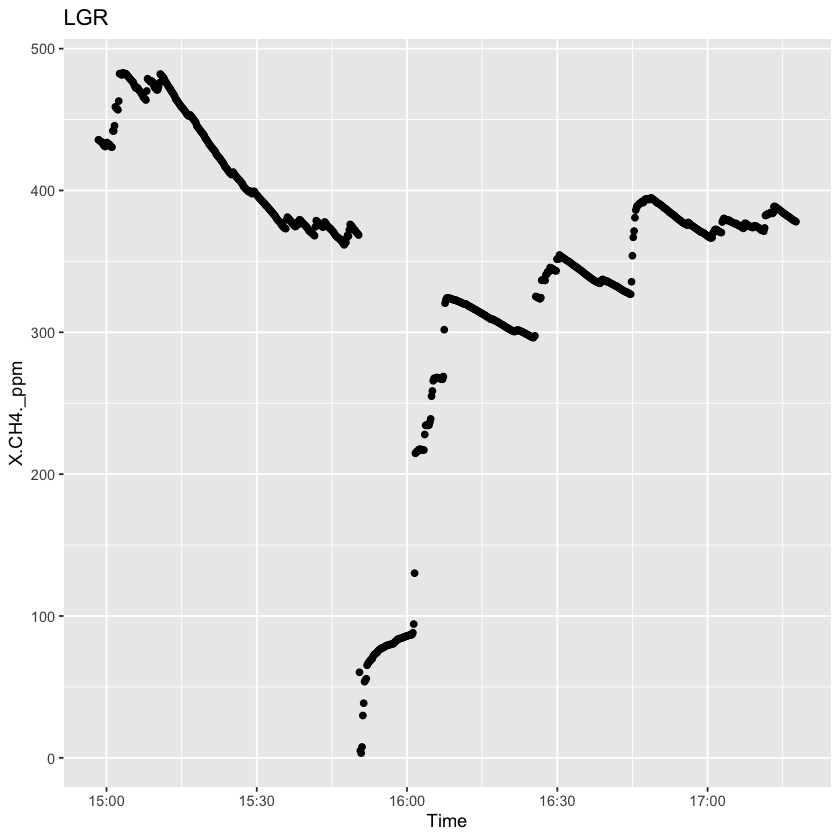

pdf 
  2

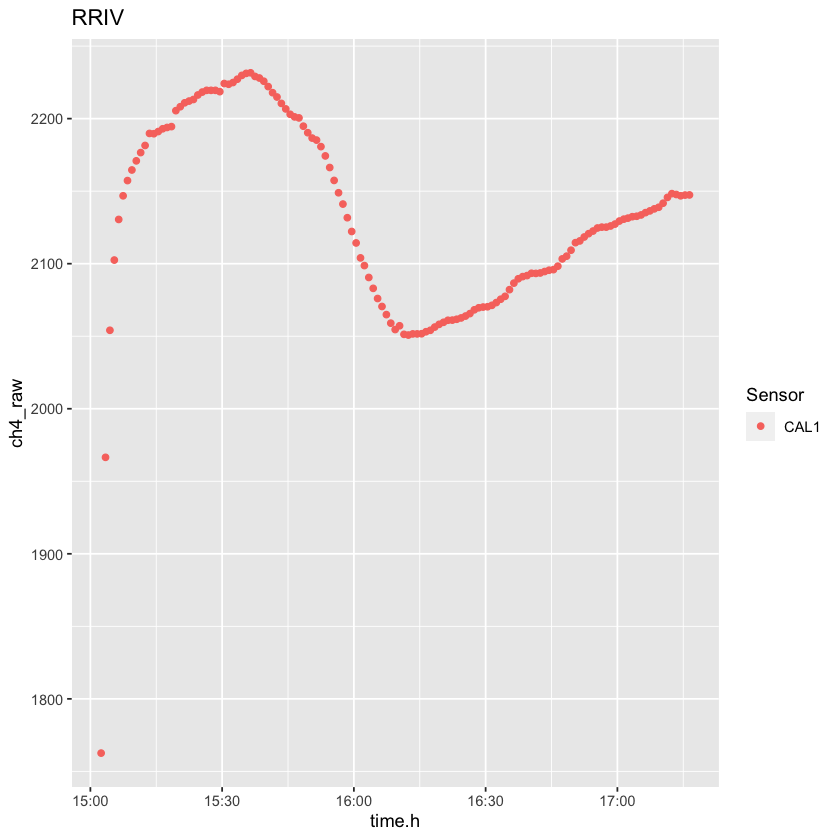

In [16]:
#LGR and CAL1 are NOT in the same bucket 
p1_lgr<-ggplot(lgr_data_overlap1, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR")
savePlot(p1_lgr,"ch4")
p1_lgr

p1_rriv<-ggplot(rriv_data_ol_summary1, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")
p1_rriv
savePlot(p1_rriv,"ch4")